In [2]:
# Importando as bibliotecas que serão utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Importando o dataset do titanic (Obtido no site kaggle)
df = pd.read_csv("diabetes_dataset.csv")

In [11]:
# Realizando análise exploratória
df.head() 

age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                 215         5.7  ...               41   
1                                 143         6.7  ...               55   
2                                  57         6.4  ...               66   
3                                  49         3.4  ...               50   
4                                 109         7.2  ...               52   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0              160            145              136                   236   
1               50             30               93                   150   
2               99             36              118                   195   
3               79            140              139                   253   
4              125            160              137                   184   

   insulin_level  hba1c  diabetes_risk_score  diabetes_stage  \
0           6.36   8.18                 29.6          Type 2   
1           2.00   5.63                 23.0     No Diabetes   
2           5.07   7.51                 44.7          Type 2   
3           5.28   9.03                 38.2          Type 2   
4          12.74   7.20                 23.5          Type 2   

   diagnosed_diabetes  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1  

[5 rows x 31 columns]

In [12]:
df.tail()

age  gender ethnicity education_level  income_level employment_status  \
99995   46    Male     Other        Graduate  Upper-Middle        Unemployed   
99996   41  Female     White        Graduate        Middle          Employed   
99997   57  Female     Black       No formal  Upper-Middle          Employed   
99998   47  Female     Black      Highschool  Lower-Middle           Retired   
99999   52  Female     White    Postgraduate        Middle          Employed   

      smoking_status  alcohol_consumption_per_week  \
99995         Former                             1   
99996          Never                             3   
99997         Former                             4   
99998          Never                             3   
99999          Never                             1   

       physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
99995                                 136         8.3  ...               45   
99996                                  76         8.8  ...               55   
99997                                 121         9.9  ...               50   
99998                                  52         5.9  ...               68   
99999                                 248         2.7  ...               31   

       ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
99995              150            116              113                   109   
99996              123            146               96                   146   
99997              111            184               93                   132   
99998               91            116              106                   117   
99999              183             87               91                   142   

       insulin_level  hba1c  diabetes_risk_score  diabetes_stage  \
99995          14.58   5.55                 26.0    Pre-Diabetes   
99996           9.02   5.97                 24.4    Pre-Diabetes   
99997           2.57   5.21                 27.6     No Diabetes   
99998           9.81   5.53                 26.4    Pre-Diabetes   
99999          15.93   5.73                 27.9    Pre-Diabetes   

       diagnosed_diabetes  
99995                   0  
99996                   0  
99997                   0  
99998                   0  
99999                   0  

[5 rows x 31 columns]

In [13]:
df.shape

(100000, 31)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [21]:
variaveis_numericas = df.select_dtypes(
    exclude = "object"
).columns
variaveis_object = df.select_dtypes(
    include = "object"
).columns

In [22]:
variaveis_numericas

Index(['age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score',
       'diagnosed_diabetes'],
      dtype='object')

In [24]:
variaveis_object

Index(['gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'diabetes_stage'],
      dtype='object')

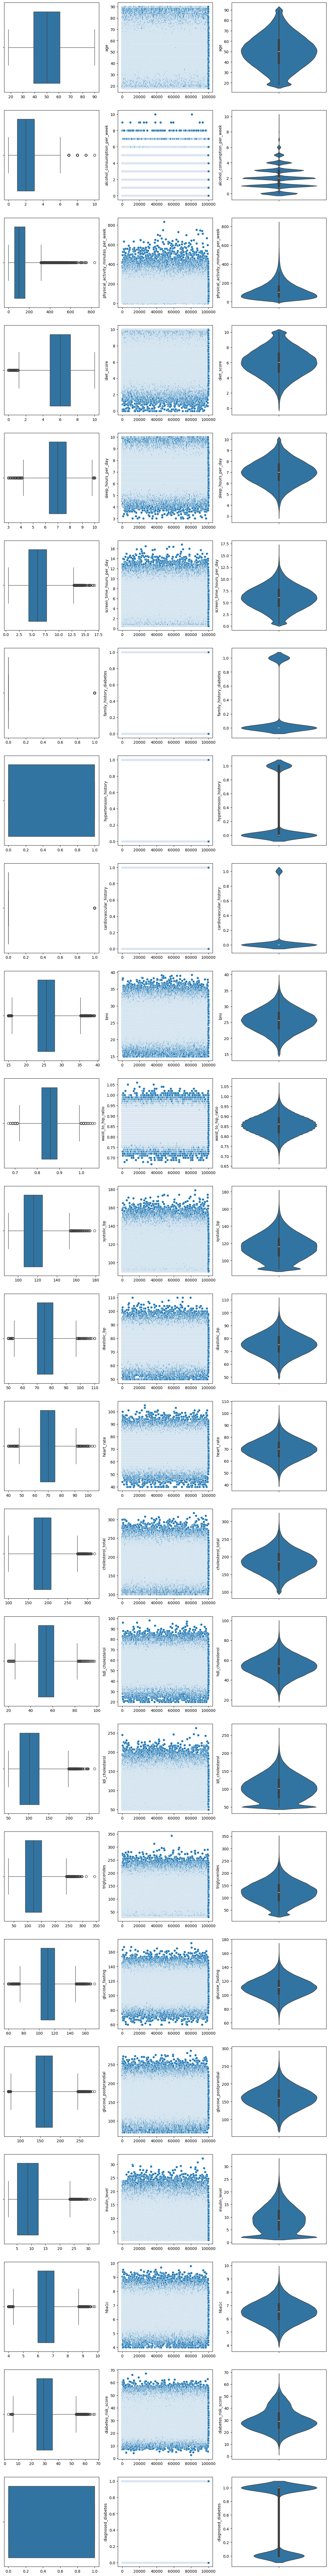

In [ ]:
fig, axs = plt.subplots(len(variaveis_numericas),
                        3,
                        figsize=(15, 5 * len(variaveis_numericas)))
for index, coluna in enumerate(variaveis_numericas):
    sns.boxplot(
        x = df[coluna],
        ax = axs[index][0]
    )
    axs[index][0].set_xlabel("")
    sns.scatterplot(
        data=df[coluna],
        ax = axs[index][1]
    )
    sns.violinplot(
        data=df[coluna],
        ax = axs[index][2]
    )
plt.show()

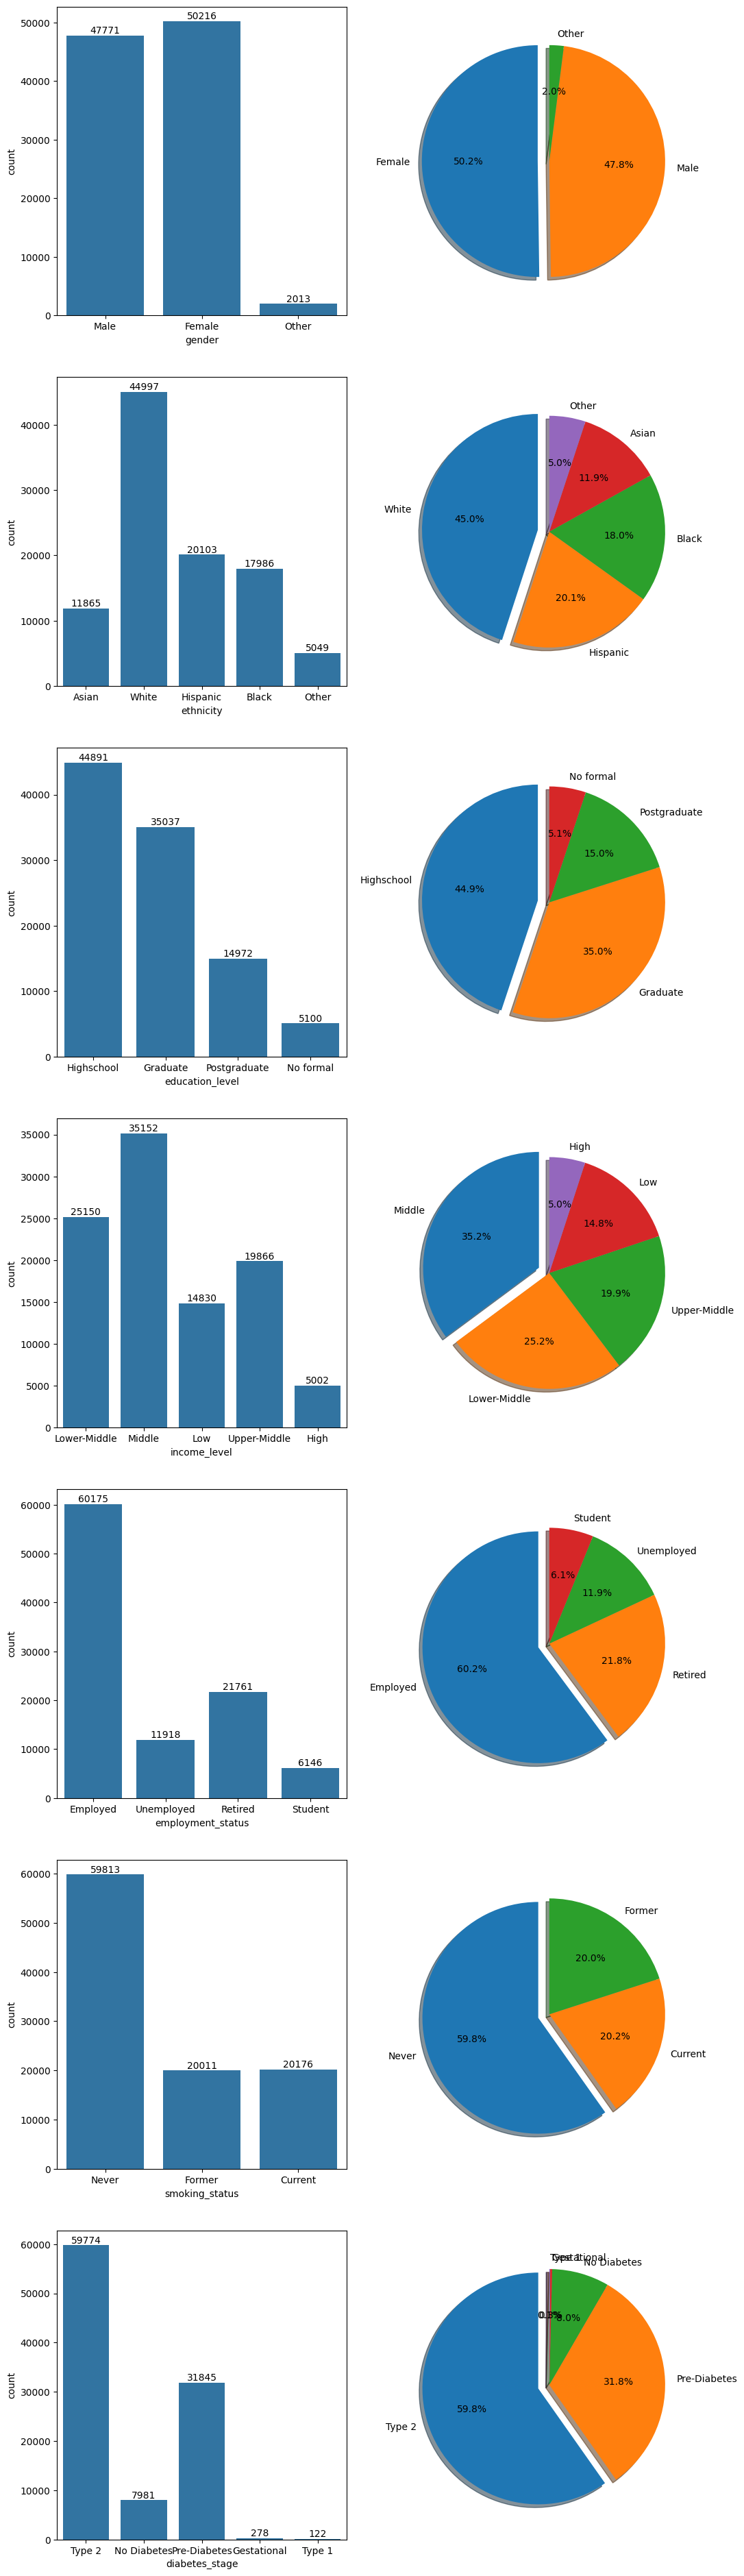

In [73]:
fig, axs = plt.subplots(
    len(variaveis_object),
    2,
    figsize=(
        12, 2 * len(variaveis_numericas)
    )
)
for index, coluna in enumerate(variaveis_object):
    count = sns.countplot(
        x = df[coluna],
        ax = axs[index][0]
    )
    for valores in count.containers:
        count.bar_label(valores)
    contagens = df[coluna].value_counts().values
    max_valor = contagens.max()
    explode = [0.1 if max_valor == valor else 0.0 for valor in contagens]
    axs[index][1].pie(
        df[coluna].value_counts().values,
        labels=df[coluna].value_counts().index,
        autopct="%1.1f%%",
        explode=explode,
        shadow=True,
        startangle=90
    )
plt.show()